# Analyze and Explore Datas

Com base nos audio features coletados do spotify, apresentado no Passo1_Spotify, 
desenvolveremos uma analise deste conjunto de dados referente aos 10 cantores e 
10 cantoras mais ouvidos pelo Spotify até julho de 2020 com os respectivos Top 10
de suas músicas. Os cantores mais ouvidos no Spotify de acordo com o ranking das pesquisas em
05 de agosto de 2020 (é válido ressaltar que o wikipedia atualiza esta lista semanalmente)

https://en.wikipedia.org/wiki/List_of_most-streamed_artists_on_Spotify,


são :

- 1 - Drake
- 2 - The Weeknd
- 3 - Dua Lipa
- 4 - Ariana Grande
- 5 - J Balvin
- 6 - Justin Bieber
- 7 - Ed Sheeran
- 8 - Marshmello
- 9 - Lady Gaga
- 10 - Khalid
- 11 - Halsey
- 12 - Travis Scoot
- 13 - Jason Derullo
- 14 - Juice WRLD
- 15 - Nicki Minaj
- 17 - Taylor Swift
- 20 - Billie Eilish
- 25 - Camila Cabello
- 28 - Beyonce
- 29 - Rihanna

O intuito na minha pesquisa é analisar um alvo (Target) de 10 cantores do gênero feminino (F) e 10 do masculino (M) por isso busquei no site https://rateyourmusic.com/list/NicklasWachter/spotify-top-100-artists-chart-29th_july_2020/, para obter a quantidade necessária.

Neste projeto vai ser mantido a representação de números estabelecida pelo spotify por pontos (sendo que no Brasil a representação numérica é por vírgula, ou seja, "0.8", no Brasil representa "0,8".)


In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [34]:
#Dados dos audio features dos 20 cantores
dataset=pd.read_csv("TOP10.csv")

In [35]:
dataset.head()

,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Artist,Target
0,UN DIA (ONE DAY) (Feat. Tainy),0EhpEsp4L0oRGM0vmeaN5e,0.00536,0.571,0.693,6,-8.234,0,0.0545,0.000000,0.1730,0.393,168.169,232253,4,Dua Lipa,F
1,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.01230,0.793,0.793,11,-4.521,0,0.0830,0.000000,0.0951,0.679,123.950,183290,4,Dua Lipa,F
2,Break My Heart,017PF4Q3l4DBUiWoXk4OWT,0.16700,0.730,0.729,4,-3.434,0,0.0883,0.000001,0.3490,0.467,113.013,221820,4,Dua Lipa,F
3,One Kiss (with Dua Lipa),7ef4DlsgrMEH11cDZd32M6,0.03700,0.791,0.862,9,-3.240,0,0.1100,0.000022,0.0814,0.592,123.994,214847,4,Dua Lipa,F
4,Physical,3AzjcOeAmA57TIOr9zF1ZW,0.01370,0.647,0.844,0,-3.756,1,0.0457,0.000658,0.1020,0.746,146.967,193829,4,Dua Lipa,F


In [4]:
#Dados separados de cantores do gênero feminino e masculino.
Fdataset=pd.read_csv('F_TOP10.csv')
Mdataset=pd.read_csv('M_TOP10.csv')

Demonstração de que todos os cantores tem a mesma quantidade 
de música coletada (Top 10 do Spotify).

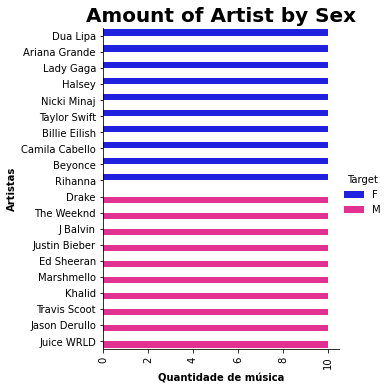

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["blue", "deeppink"]
sns.set_palette(sns.color_palette(colors))
Graph=sns.catplot(y="Artist", kind="count", hue="Target", data=dataset)
Graph.ax.set_title('Amount of Artist by Sex', fontsize=20, weight='bold')
Graph.ax.set_xlabel("Quantidade de música", weight='bold')
Graph.ax.set_ylabel("Artistas", weight='bold')
Graph.set_xticklabels(rotation=90)

Analisando inicialmeente a medida de valence que corresponde a positividade e negatividade da música
(1.0 é muito positiva e 0 muito negativa). É perceptível  pelo gŕafico abaixo que cantores como J Balvin
e Justin Bieber tem no seu top 10 mais músicas conceituadas como positivas (felizes, alegres, eufóricas).
Enquanto Billie Eilish e Taylor Swift tem músicas mais negativas (tristes, depressivas, zangadas).


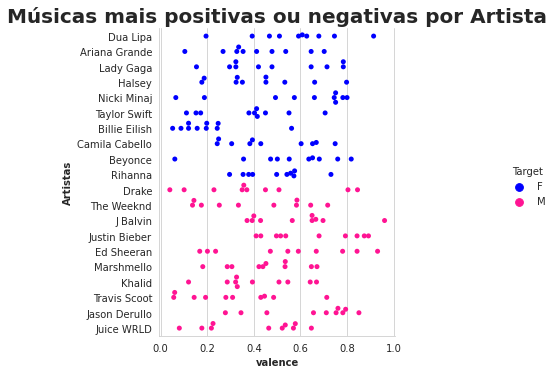

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create an array with the colors you want to use
colors = ["blue", "deeppink"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
Graph=sns.catplot(y="Artist", x="valence", kind="swarm", hue="Target", data=dataset)
Graph.ax.set_title('Músicas mais positivas ou negativas por Artista', fontsize=20, weight='bold')
Graph.ax.set_ylabel("Artistas", weight='bold')
Graph.ax.set_xlabel("valence", weight='bold')
plt.show()

**Analise de forma categórica das medidas de audio features**

Algumas audio features do Spotify tem suas medidas estabelecidas entre os valores 0.0 e 1.0 são elas:

- acousticness,

- danceability,

- energy,

- speechiness,

- liveness,

- instrumentalness.

No intuito de identificar quais músicas tem medidas realmente baixas ou altas. Essas features serão
classificadas em três categorias, low, medium e high. Onde,

- low: entre 0.0 e 0.33,

- medium: entre 0.34 e 0.65

- high: entre 0.66 e 1.0

Com isso a categoria low será considerada realmente baixa, high realmente alta e medium uma medida intermediária.

In [49]:
#Criando uma lista com as audio features que serão categorizadas
basic=dataset[['valence','acousticness','danceability','energy','speechiness','liveness','instrumentalness']]

In [50]:
# Carregar uma lista categórica
for j in range(0,7):
    xlist=[]
    for i in basic[basic.columns[j]].iteritems():
        value = (i[1])
        if value <= 0.33:
            xlist.append('low')
        elif value > 0.33 and value < 0.66:
            xlist.append('medium')
        else:
            xlist.append('high')
    basic[basic.columns[j]]=xlist

In [51]:
#Incluindo a coluna target no conjunto de dados agora categórico
basic=pd.concat([basic, dataset.Target], axis=1)
basic.head()

,valence,acousticness,danceability,energy,speechiness,liveness,instrumentalness,Target
0,medium,low,medium,high,low,low,low,F
1,high,low,high,high,low,low,low,F
2,medium,low,high,high,low,medium,low,F
3,medium,low,high,high,low,low,low,F
4,high,low,medium,high,low,low,low,F


In [52]:
# imprime a contagem de categorias por features
basic.valence.value_counts()

medium    94
low       60
high      46
Name: valence, dtype: int64

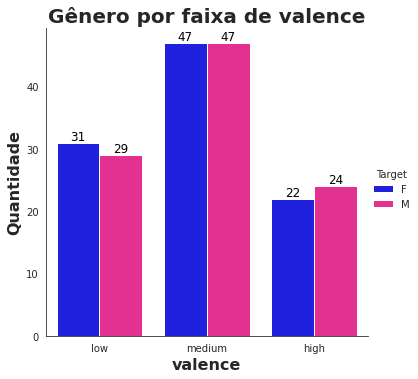

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set_style("white")
colors = ["blue", "deeppink"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
Graph=sns.catplot(x="valence", kind="count", hue="Target", data=basic,
                 order=["low", "medium","high"])
Graph.ax.set_title('Gênero por faixa de valence', fontsize=20, weight='bold')
Graph.ax.set_ylabel("Quantidade", fontsize=16, weight='bold')
Graph.ax.set_xlabel("valence", fontsize=16, weight='bold')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

Há uma tendência relativa neste período até julho de 2020 dos ouvintes do Spotify buscar mais músicas classificadas como negativas(low) do que como positivas(high). Ressaltando que as músicas classificadas como intermediária (medium), possivelmente tem uma probabilidade mais incerta sobre a música ser positiva ou negativa e esta interpetação será considerada nas features dos demais gráficos categóricos.
E há ainda uma pequena tendência das músicas das cantoras serem um pouco mais negativas que as dos cantores.

In [84]:
#Contabilizando a categorização de instrumentalness e liveness
basic.instrumentalness.value_counts()

high      120
medium     79
low         1
Name: danceability, dtype: int64

In [85]:
basic.liveness.value_counts()

low       178
medium     19
high        3
Name: liveness, dtype: int64

In [114]:
basic.speechiness.value_counts()

low       188
medium     12
Name: speechiness, dtype: int64

As audio features speechiness, instrumentalness e liveness  tem 0, 1 e 3 músicas categorizadas como alta, o que significa que não é um estilo de música comum que se encontra na lista dos Top 10 dos cantores mais ouvidos. Portanto, os usuários de Spotify não costumam ouvir em sua maioria, músicas classificadas como altamente instrumentais ou "ao vivo" ou de muita palavras falada sem acompanhar a melodia.

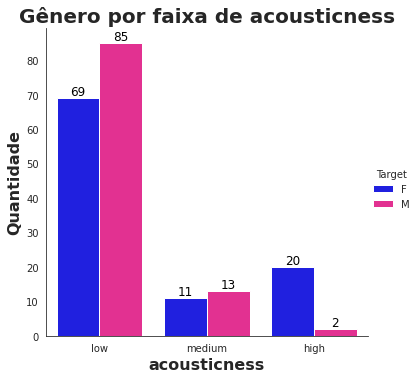

In [144]:
#Analise do Acousticness
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
colors = ["blue", "deeppink"]
sns.set_palette(sns.color_palette(colors))
Graph=sns.catplot(x="acousticness", kind="count", hue="Target", data=basic)
Graph.ax.set_title('Gênero por faixa de acousticness', fontsize=20, weight='bold')
Graph.ax.set_ylabel("Quantidade", fontsize=16, weight='bold')
Graph.ax.set_xlabel("acousticness", fontsize=16, weight='bold')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

Por este gráfico é bem perceptível que a maioria das músicas tem uma baixa classificação como acousticness e que a maioria das músicas altamente acousticness são das cantoras, e consequentemente os 10 cantores mais ouvidos pelo Spotify tem uma tendência a terem músicas menos acousticness em relação as 10 cantoras.

posx and posy should be finite values
posx and posy should be finite values


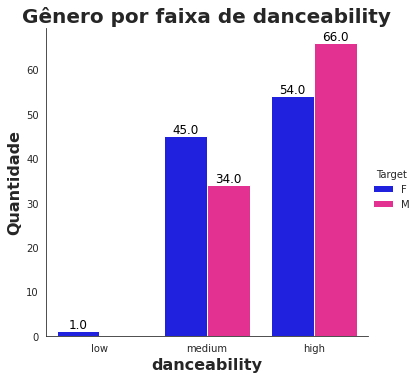

In [145]:
#Análise da danceability
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
colors = ["blue", "deeppink"]
sns.set_palette(sns.color_palette(colors))
Graph=sns.catplot(x="danceability", kind="count", hue="Target", data=basic,
                 order=["low", "medium","high"])
Graph.ax.set_title('Gênero por faixa de danceability', fontsize=20, weight='bold')
Graph.ax.set_ylabel("Quantidade", fontsize=16, weight='bold')
Graph.ax.set_xlabel("danceability", fontsize=16, weight='bold')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%s' % str(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

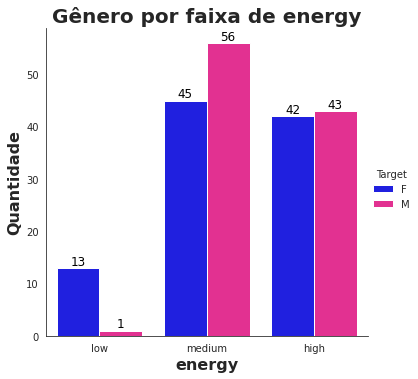

In [146]:
#Análise da danceability
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
colors = ["blue", "deeppink"]
sns.set_palette(sns.color_palette(colors))
Graph=sns.catplot(x="energy", kind="count", hue="Target", data=basic,
                 order=["low", "medium","high"])
Graph.ax.set_title('Gênero por faixa de energy', fontsize=20, weight='bold')
Graph.ax.set_ylabel("Quantidade", fontsize=16, weight='bold')
Graph.ax.set_xlabel("energy", fontsize=16, weight='bold')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%s' % str(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

Há uma maior tendência das músicas serem classificadas com alta danceability, sendo a maioria dos cantores de gênero masculino. E ao mesmo tempo as músicas de mais baixa energy são das 10 cantoras

Fazendo uma analise resumida abaixo da loudness do Top 10 dos cantores é perceptível que a maioria das músicas estão entre -10 e -5 decibéis.

**Analise das medidas de audio features fornecidas pelo spotify**

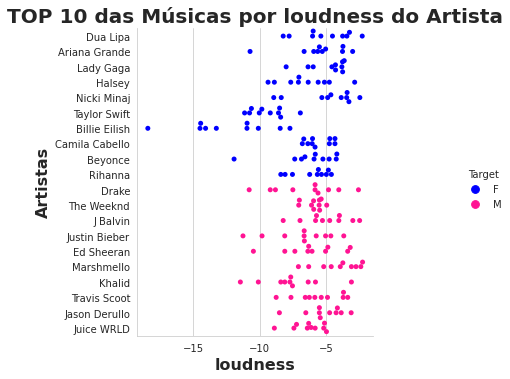

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
colors = ["blue", "deeppink"]
sns.set_palette(sns.color_palette(colors))
Graph=sns.catplot(y="Artist", x="loudness", kind="swarm", hue="Target", data=dataset)
Graph.ax.set_title('TOP 10 das Músicas por loudness do Artista', fontsize=20, weight='bold')
Graph.ax.set_ylabel("Artistas", fontsize=16, weight='bold')
Graph.ax.set_xlabel("loudness", fontsize=16, weight='bold')
Graph.savefig("loudness.png")
plt.show()

Comparando a linearidade entre features energy e danceability é possível identificar uma correlação nos Top 10 dos cantores, o que implica que os usuários do Spotify procuram músicas com maior energia e mais dançante ao mesmo tempo.

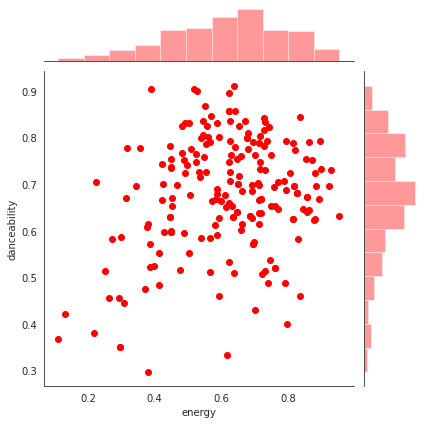

In [134]:
sns.jointplot(x="energy", y="danceability", color='r', data=dataset)
sns.set_style("white")

Comparando a danceability e energy por gênero é perceptível que há um número considerável de músicas com baixa danceability e baixa energy do gênero feminino, o que implica que os usuários tem uma característica de ouvir músicas mais lentas, calmas  e pouco dançantes de cantores do gênero feminino no top 10.

Text(0.5, 0, 'energy')

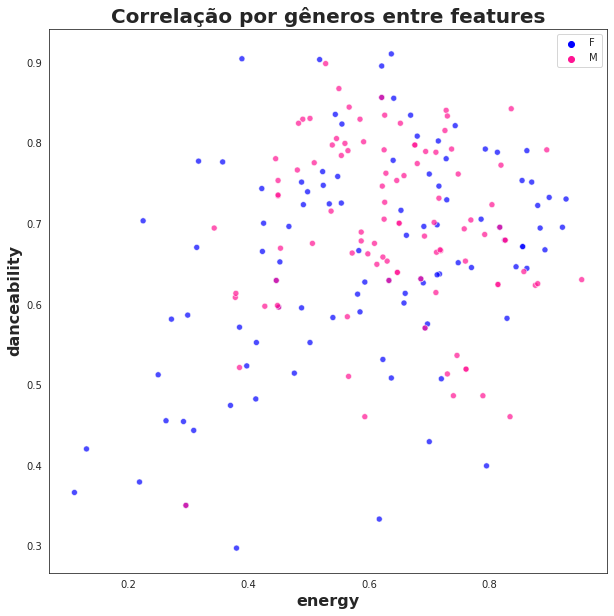

In [150]:
sns.set_style("white")
plt.figure(figsize=(10,10))
colors = ["blue", "deeppink"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
ax = sns.scatterplot(data=dataset, x='energy', y='danceability', 
                     hue='Target', palette=colors, 
#                     size='duration_ms', sizes=(0.5,200), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best')
ax.set_title('Correlação por gêneros entre features', fontsize=20, weight='bold')
ax.set_ylabel("danceability", fontsize=16, weight='bold')
ax.set_xlabel("energy", fontsize=16, weight='bold')

Text(0.5, 0, 'valence')

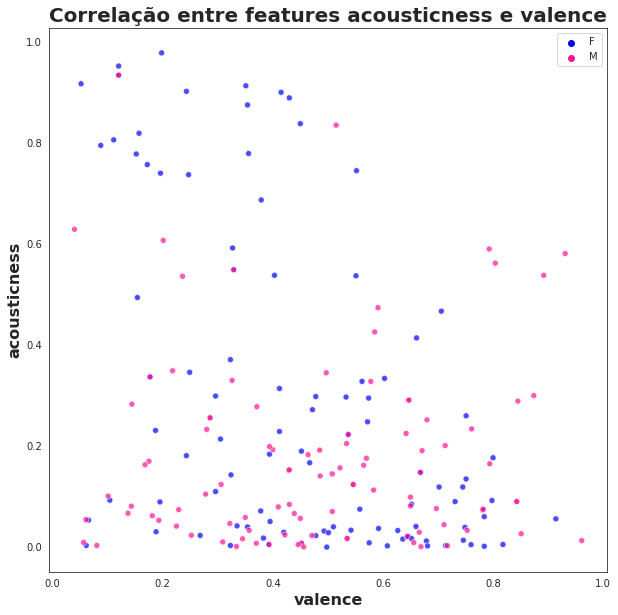

In [151]:
sns.set_style("white")
plt.figure(figsize=(10,10))
colors = ["blue", "deeppink"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
ax = sns.scatterplot(data=dataset, x='valence', y='acousticness', 
                     hue='Target', palette=colors, 
#                     size='duration_ms', sizes=(0.5,200), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best')
ax.set_title('Correlação entre features acousticness e valence', fontsize=20, weight='bold')
ax.set_ylabel("acousticness", fontsize=16, weight='bold')
ax.set_xlabel("valence", fontsize=16, weight='bold')

E desta última correlação podemos perceber ainda que há uma tendência de uma parcela das músicas mais acousticness terem uma característica de músicas mais tristes, depressivas e zangadas (valence negativo) e esta faz parte do repertório das cantoras no top 10.